# 1. Optimization and Estimation

To accomplish the goal of reducing the generalization error, we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error. We begin by importing a few libraries with a function to annotate in a figure.

In [1]:
!pip install d2l==0.11.2

In [2]:
!pip install mxnet

     |████████████████████████████████| 55.0MB 69kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


## 1.1. Optimization and Estimation

In [3]:
%matplotlib inline
import d2l
from mpl_toolkits import mplot3d
import numpy as np

In [5]:
# Save to the d2l package.
def annotate(text, xy, xytext):
  d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))

The graph below illustrates the issue in some more detail. Since we have only a finite amount of data the
minimum of the training error may be at a different location than the minimum of the expected error (or of
the test error).

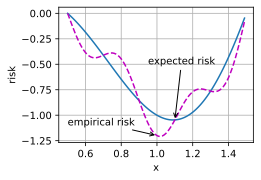

In [6]:
def f(x): 
  return x * np.cos(np.pi * x)
def g(x): 
  return f(x) + 0.2 * np.cos(5 * np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(0.5, 1.5, 0.01)
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('empirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('expected risk', (1.1, -1.05), (0.95, -0.5))

## 1.2. Optimization challenges in deep learning

There are many challenges in deep learning optimization. Some of the most vexing ones are local minima, saddle points and vanishing gradients.

### Local minima

For the objective function $f(x)$, if the value of $f(x)$ at $x$ is smaller than the values of $f(x)$ at any other points in the vicinity of $x$, then $f(x)$ could be a local minimum. If the value of $f(x)$ at $x$ is the minimum of
the objective function over the entire domain, then $f(x)$ is the global minimum. For example, given the function:
\begin{equation*}
 f(x) = x.cos({\pi}x)\space \: for \:-1.0 \leq x \leq 2.0
\end{equation*}
we can approximate the local minimum and global minimum of this function, as illustrated below:

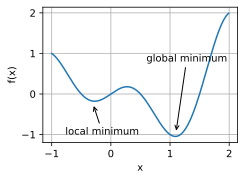

In [7]:
x = np.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

### Saddle point

A saddle point is any
location where all gradients of a function vanish but which is neither a global nor a local minimum. Consider
the function $f(x) = x^3$. Its first and second derivative vanish for $x = 0$. Optimization might stall at the
point, even though it is not a minimum.

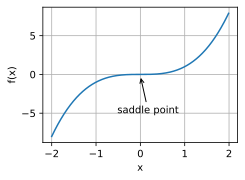

In [8]:
x = np.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

An example of 2-dimension saddle point is illustrated as below. Consider the
function $f(x, y) = x^2 - y^2$. It has its saddle point at (0, 0). This is a maximum with respect to $y$ and a
minimum with respect to $x$. Moreover, it looks like a saddle, which is where this mathematical property got
its name.:

Text(0.5, 0, 'y')

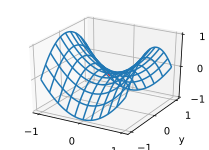

In [9]:
x, y = np.mgrid[-1: 1: 101j, -1: 1: 101j]
z = x**2 - y**2
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')

### Vanishing gradient

An example of vanishing gradient is illustrated as below. We assume that we
want to minimize the function $f(x) = tanh(x)$ and we happen to get started at $x = 4$. As we can see, the
gradient of f is close to nil. More specifically $f'(x) = 1 - tanh^2(x)$ and thus $f'(4) = 0.0013$. Consequently
optimization will get stuck for a long time before we make progress:

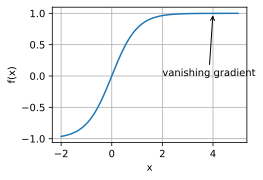

In [10]:
x = np.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [np.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

# 2. Convexity

If the algorithm performs poorly
even in the convex setting we should not hope to see great results otherwise. Furthermore, even though
the optimization problems in deep learning are generally nonconvex, they often exhibit some properties of
convex ones near local minima.

## 2.1. Basics

### Function

Given a convex set $X$ a function defined on it $f: X \rightarrow R$ is convex if for all $x$, $x′$ $\in X$ and for all  $\lambda \in [0, 1]$ we have:
\begin{equation*}
\lambda f(x) + (1 - \lambda)f(x') \geq f(\lambda x + (1 - \lambda)x')
\end{equation*}
To illustrate a convex function, at first we need to import a few libraries:

In [11]:
%matplotlib inline
import d2l
from mpl_toolkits import mplot3d
import numpy as np

Let’s define a few functions, both convex and nonconvex.

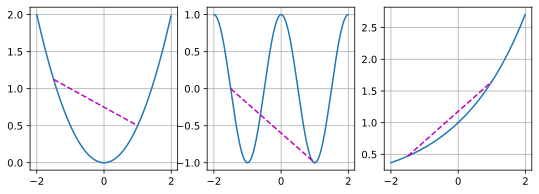

In [12]:
# convex
def f(x): 
  return 0.5 * x**2 

# nonconvex
def g(x): 
  return np.cos(np.pi * x) 

# convex
def h(x): 
  return np.exp(0.5 * x) 

x, segment = np.arange(-2, 2, 0.01), np.array([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
  d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

As expected, the cosine function is nonconvex, whereas the parabola and the exponential function are.
Note that the requirement that $X$ is necessary for the condition to make sense. Otherwise the outcome of
$f(\lambda x + (1  - \lambda)x')$ might not be well defined. Convex functions have a number of desirable properties.

## 2.2. Properties

### No local minima

In particular, convex functions do not have local minima. It means that if we minimize functions we cannot "get stuck". Note, though, that this doesn't means that there cannot be more than
one global minimum or that there might even exist one.

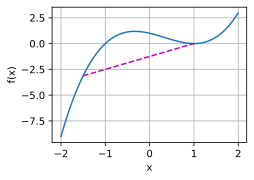

In [13]:
def f(x): 
  return (x-1)**2 * (x+1)

d2l.set_figsize((3.5, 2.5))
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

### Convex functions and sets

Convex functions define convex sets as below-sets. They are defined as

\begin{equation*}
S_b := \{x|x \in X \: and \: f(x) \leq b\}
\end{equation*}
Have a look at the function $f(x,y) = 0.5x^2 + \cos(2\pi y)$ below. It is clearly nonconvex. The level sets are correspondingly nonconvex. In fact, they’re typically composed of disjoint sets.

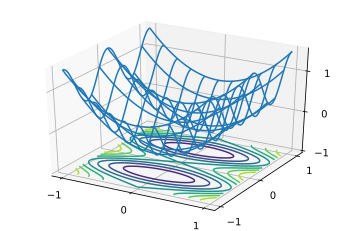

In [14]:
x, y = np.mgrid[-1: 1: 101j, -1: 1: 101j]
z = x**2 + 0.5 * np.cos(2 * np.pi * y)

# Plot the 3D surface
d2l.set_figsize((6,4))
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.contour(x, y, z, offset=-1)
ax.set_zlim(-1, 1.5)

# Adjust labels
for func in [d2l.plt.xticks, d2l.plt.yticks, ax.set_zticks]: 
  func([-1,0,1])

### Derivatives and Convexity

Whenever the second derivative of a function exists it is very easy to check for convexity. All we need to do is check whether all of its eigenvalues are nonnegative. For instance, the function
$f(x) = \frac{1}{2}∥x∥^2_2$
is convex since $\partial^2_x f = 1$, i.e. its derivative is the identity matrix.
We omit a more formal derivation in favor of a graph below:

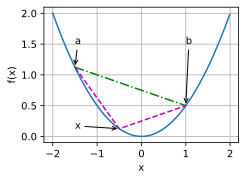

In [15]:
def f(x): 
  return 0.5 * x**2

x, axb, ab = np.arange(-2, 2, 0.01), np.array([-1.5, -0.5, 1]), np.array([-1.5, 1])
d2l.set_figsize((3.5, 2.5))
d2l.plot([x, axb, ab], [f(x) for x in [x, axb, ab]], 'x', 'f(x)')
d2l.annotate('a', (-1.5, f(-1.5)), (-1.5, 1.5))
d2l.annotate('b', (1, f(1)), (1, 1.5))
d2l.annotate('x', (-0.5, f(-0.5)), (-1.5, f(-0.5)))

# 3. Gradient Descent

## 3.1. Gradient Descent in One Dimension

As an example below, we illustrate how to implement gradient descent. As always, we begin by importing all required modules:
For simplicity we choose the objective function $f(x) = x^2$ to illustrate how to implement gradient descent.
Although we know that $x = 0$ is the solution to minimize $f(x)$, we still use this simple function to observe
how $x$ changes. As always, we begin by importing all required modules.

In [16]:
%matplotlib inline
import d2l
import numpy as np
import math
def f(x): 
  return x**2 # objective function
def gradf(x): 
  return 2 * x # its derivative

Next, we use $x = 10$ as the initial value and assume $\eta = 0.2$. Using gradient descent to iterate $x$ for 10 times, we can see that, eventually, the value of x approaches the optimal solution:

In [17]:
def gd(eta):
  x = 10
  results = [x]
  for i in range(10):
    x -= eta * gradf(x)
    results.append(x)
  print('epoch 10, x:', x)
  return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


The progress of optimizing over $x$ can be plotted as follows.

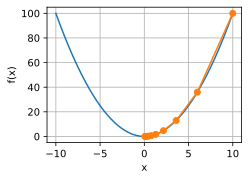

In [18]:
def show_trace(res):
  n = max(abs(min(res)), abs(max(res)))
  f_line = np.arange(-n, n, 0.01)
  d2l.set_figsize((3.5, 2.5))
  d2l.plot([f_line, res], [[f(x) for x in f_line], [f(x) for x in res]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(res)

### Learning Rate

The learning rate $\eta$ can be set by the algorithm designer. If we use a learning rate that is too small, it will
cause x to update very slowly, requiring more iterations to get a better solution. To show what happens in
such a case, consider the progress in the same optimization problem for $\eta = 0.05$. As we can see, even after
10 steps we are still very far from the optimal solution.

epoch 10, x: 3.4867844009999995


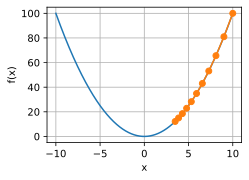

In [19]:
show_trace(gd(0.05))

Conversely, if we use an excessively high learning rate, $|\eta f'(x)|$ might be too large for the first-order Taylor
expansion formula. In this case, we cannot guarantee that the iteration of $x$ will be able to lower the value of $f(x)$. For example, when we set the learning rate to $\eta = 1.1$, $x$ overshoots the optimal solution $x = 0$ and gradually diverges.

epoch 10, x: 61.917364224000096


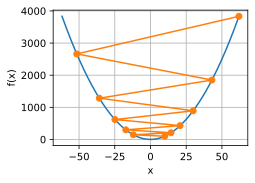

In [20]:
show_trace(gd(1.1))

### Local Minima

To illustrate what happens for nonconvex functions consider the case of $f(x) = x . \cos cx$. This function
has infinitely many local minima. Depending on our choice of learning rate and depending on how well
conditioned the problem is, we may end up with one of many solutions. The example below illustrates how
an (unrealistically) high learning rate will lead to a poor local minimum.

In [21]:
c = 0.15 * math.pi
def f(x): 
  return x*math.cos(c * x)
def gradf(x): 
  return math.cos(c * x) - c * x * math.sin(c * x)

epoch 10, x: -1.528165927635083


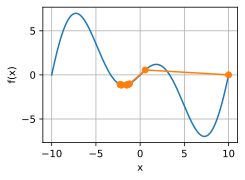

In [22]:
show_trace(gd(2))

## 3.2. Multivariate Gradient Descent

In [23]:
# Save to the d2l package.
def train_2d(trainer):
  """Optimize a 2-dim objective function with a customized trainer."""
  # s1 and s2 are internal state variables and will
  # be used later in the chapter
  x1, x2, s1, s2 = -5, -2, 0, 0
  results = [(x1, x2)]
  for i in range(20):
    x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
    results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
  return results

# Save to the d2l package.
def show_trace_2d(f, results):
  """Show the trace of 2D variables during optimization."""
  d2l.set_figsize((3.5, 2.5))
  d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
  d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
  d2l.plt.xlabel('x1')
  d2l.plt.ylabel('x2')

epoch 1, x1 -4.000000, x2 -1.200000
epoch 2, x1 -3.200000, x2 -0.720000
epoch 3, x1 -2.560000, x2 -0.432000
epoch 4, x1 -2.048000, x2 -0.259200
epoch 5, x1 -1.638400, x2 -0.155520
epoch 6, x1 -1.310720, x2 -0.093312
epoch 7, x1 -1.048576, x2 -0.055987
epoch 8, x1 -0.838861, x2 -0.033592
epoch 9, x1 -0.671089, x2 -0.020155
epoch 10, x1 -0.536871, x2 -0.012093
epoch 11, x1 -0.429497, x2 -0.007256
epoch 12, x1 -0.343597, x2 -0.004354
epoch 13, x1 -0.274878, x2 -0.002612
epoch 14, x1 -0.219902, x2 -0.001567
epoch 15, x1 -0.175922, x2 -0.000940
epoch 16, x1 -0.140737, x2 -0.000564
epoch 17, x1 -0.112590, x2 -0.000339
epoch 18, x1 -0.090072, x2 -0.000203
epoch 19, x1 -0.072058, x2 -0.000122
epoch 20, x1 -0.057646, x2 -0.000073


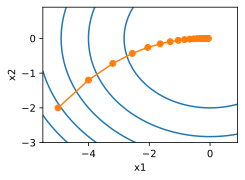

In [24]:
def f(x1, x2): 
  # objective
  return x1 ** 2 + 2 * x2 ** 2 

def gradf(x1, x2): 
  # gradient
  return (2 * x1, 4 * x2) 

def gd(x1, x2, s1, s2):
  (g1, g2) = gradf(x1, x2) # compute gradient
  return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables

eta = 0.1
show_trace_2d(f, train_2d(gd))

epoch 0, x: 8.00018159147481
epoch 1, x: 6.0015227485135565
epoch 2, x: 4.011398229022884
epoch 3, x: 2.0825421834074804
epoch 4, x: 0.5257631592168073
epoch 5, x: 0.011785578458138435
epoch 6, x: 1.3641603793801416e-07
epoch 7, x: 1.852884572118782e-22
epoch 8, x: 0.0
epoch 9, x: 0.0


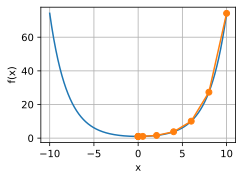

In [34]:
c = 0.5
def f(x): 
  return math.cosh(c * x) # objective

def gradf(x): 
  return -c * math.sinh(c * x) # derivative

def hessf(x): 
  return -c**2 * math.cosh(c * x) # hessian

# hide learning rate for now
def newton(eta = 1):
  x = 10
  results = [x]
  for i in range(10):
    x -= eta * gradf(x) / hessf(x)
    results.append(x)
    print('epoch {}, x: {}'.format(i, x))
  #print('epoch 10, x: ', x)
  return results

show_trace(newton())

epoch 0, x: 5.000000000000003
epoch 1, x: 24.994879494194016
epoch 2, x: 27.783105997122323
epoch 3, x: 26.800099279328098
epoch 4, x: 26.834178613689314
epoch 5, x: 26.83413291332453
epoch 6, x: 26.83413291324767
epoch 7, x: 26.83413291324767
epoch 8, x: 26.83413291324767
epoch 9, x: 26.83413291324767
epoch 10, x:  26.83413291324767


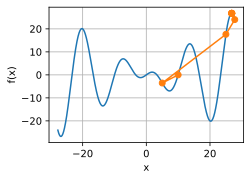

In [32]:
c = 0.15 * math.pi
def f(x): 
  return x*math.cos(c * x)

def gradf(x): 
  return math.cos(c * x) - c * x * math.sin(c * x)

def hessf(x): 
  return - 2 * c * math.sin(c * x) - x * c**2 * math.cos(c * x)

show_trace(newton())

epoch 0, x: 7.500000000000002
epoch 1, x: 7.3871648802624845
epoch 2, x: 7.329002380746055
epoch 3, x: 7.2993923724814165
epoch 4, x: 7.284441656516651
epoch 5, x: 7.27692802722112
epoch 6, x: 7.273161403549493
epoch 7, x: 7.27127560859203
epoch 8, x: 7.270332086428487
epoch 9, x: 7.269860168684531
epoch 10, x:  7.269860168684531


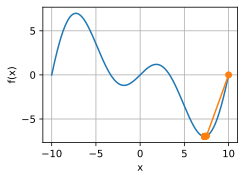

In [33]:
show_trace(newton(0.5))